# Multiple Island model

Runs an experiment with multiple islands through the Model class found in
the classes folder.
The experiment is set up in a way that every model run uses two islands. The two islands are placed apart from each other at an increasing distance to look at the change in interaction.

In [1]:
from classes.model import Model

In [8]:
import numpy as np
import matplotlib.pyplot as plt

## Set parameters

In [2]:
# Set parameters
island_size = 70
total_grid = 20000
iterations = 1000000

In [24]:
# Calculate the minimum distance between two islands
one_distance = int(island_size / 2) + 1
distances = [one_distance, 2 * one_distance, 3 * one_distance, 5 * one_distance]

In [25]:
print(distances)

[36, 72, 108, 180]


## Simulation

In [27]:
def simulation(island_size, total_grid, iterations, distances) -> list:
    """
    Runs multiple models for different distances.
    Parameters:
    - island_size (int): size of every single island
    - total_grid (int): size of the total grid containing every island
    - iterations (int): number of iterations per model
    - distances (list): every distance the model has to run
    """
    models = list()

    # Go through every distance
    for dist in distances:
        temp_list = list()

        # Run each distance five times
        for i in range(5):
            model = Model(island_size, total_grid, iterations, dist)
            model.run()
            temp_list.append(model)
            print(f'{i}th run of distance {dist}')
        print(f'Distance: {dist}done')
        models.append(temp_list)
    return models

In [28]:
# Good run with the current parameter settings
data_2 = simulation(island_size, total_grid, iterations, distances)

0th run of distance 36
1th run of distance 36
2th run of distance 36
3th run of distance 36
4th run of distance 36
Distance: 36done
0th run of distance 72
1th run of distance 72
2th run of distance 72
3th run of distance 72
4th run of distance 72
Distance: 72done
0th run of distance 108
1th run of distance 108
2th run of distance 108
3th run of distance 108
4th run of distance 108
Distance: 108done
0th run of distance 180
1th run of distance 180
2th run of distance 180
3th run of distance 180
4th run of distance 180
Distance: 180done


In [6]:
# Old run with former parameter settings
data = simulation(island_size, total_grid, iterations, distances)

0th run of distance 36
1th run of distance 36
2th run of distance 36
3th run of distance 36
4th run of distance 36
36 done
0th run of distance 360
1th run of distance 360
2th run of distance 360
3th run of distance 360
4th run of distance 360
360 done
0th run of distance 3600
1th run of distance 3600
2th run of distance 3600
3th run of distance 3600
4th run of distance 3600
3600 done
0th run of distance 36000
1th run of distance 36000
2th run of distance 36000
3th run of distance 36000
4th run of distance 36000
36000 done


### Number of migrations vs distance

In [30]:
def counter_stats(dist) -> list:
    """ 
    Extracts the number of migrations from every model.
    """
    counter_list = list()
    for run in dist:
        counter_list.append(run.counter)
    return np.std(counter_list), np.mean(counter_list)


In [73]:
counter_stdev = list()
counter_mean = list()

# For every distance calculate the mean and standard deviation
for dist in data_2:
    stdev, mean = counter_stats(dist)
    counter_mean.append(mean)
    counter_stdev.append(stdev)
    print(stdev)

178.53335822753124
31.25635935293808
3.4641016151377544
0.0


In [74]:
bottom_line = [counter_mean[i] - counter_stdev[i] for i in range(len(counter_mean))]
upper_line = [counter_mean[i] + counter_stdev[i] for i in range(len(counter_mean))]

In [96]:
# Plot analytical solution
x_analytical = [i for i in range(one_distance, distances[-1])]
y_analytical = [iterations * np.exp(-j * 0.1) for j in x_analytical]

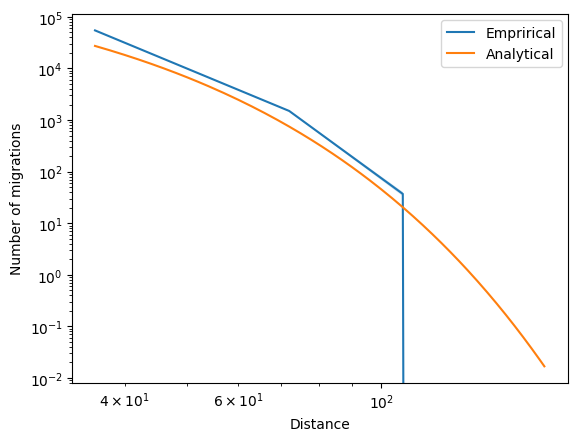

In [122]:
plt.loglog(distances, counter_mean, label='Emprirical')
plt.loglog(x_analytical, y_analytical, label='Analytical')
plt.ylabel('Number of migrations')
plt.xlabel('Distance')
plt.legend()
plt.fill_between(distances, bottom_line, upper_line, alpha=0.2, label='Std. dev')

### Convergence Plots

In [109]:
def species_stats(dist):
    species_mean_list = list()
    species_stdev_list = list()
    for i in range(len(dist[0].islands[1].species)):
        temp_list = [dist[0].islands[1].species[i], dist[1].islands[1].species[i], 
                     dist[2].islands[1].species[i], dist[3].islands[1].species[i], 
                     dist[4].islands[1].species[i]]
        species_mean_list.append(np.mean(temp_list))
        species_stdev_list.append(np.std(temp_list))
    return species_mean_list, species_stdev_list

In [110]:
species_stdev_1 = list()
species_mean_1 = list()

for dist in data_2:
    temp_mean, temp_stdev = species_stats(dist)
    species_mean_1.append(temp_mean)
    species_stdev_1.append(temp_stdev)

In [56]:
species_stdev = list()
species_mean = list()

for dist in data_2:
    temp_mean, temp_stdev = species_stats(dist)
    species_mean.append(temp_mean)
    species_stdev.append(temp_stdev)

In [103]:
def convergence_plot(species, species_stdev, iterations) -> None:
    x_axis = [i for i in range(iterations) if i % 1000 == 0]
    plt.loglog(x_axis, species)
    bottom_line_species = [species[i] - species_stdev[i] for i in range(len(species))]
    upper_line_species = [species[i] + species_stdev[i] for i in range(len(species))]
    plt.fill_between(x_axis, bottom_line_species, upper_line_species, alpha=0.2, label='Std. dev')
    plt.ylabel('Number of species')
    plt.xlabel('Iteration')
    plt.show()

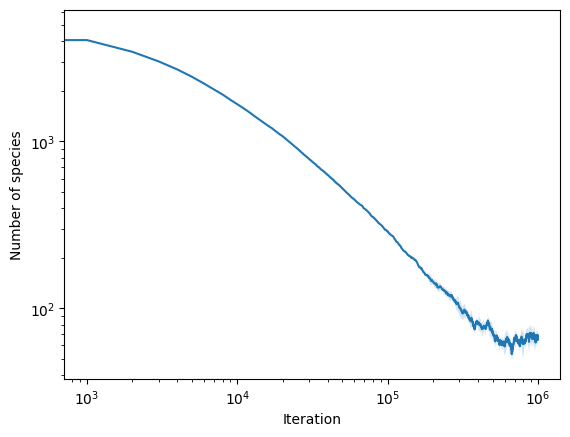

In [111]:
# Base Island
convergence_plot(species_mean[0], species_stdev[0], iterations)

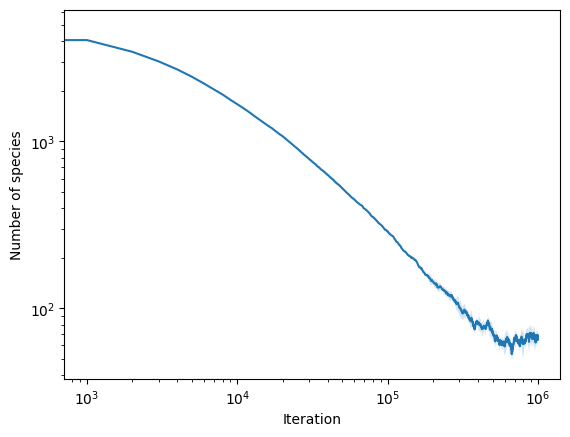

In [104]:
# Distance is equal to 36
convergence_plot(species_mean[0], species_stdev[0], iterations)

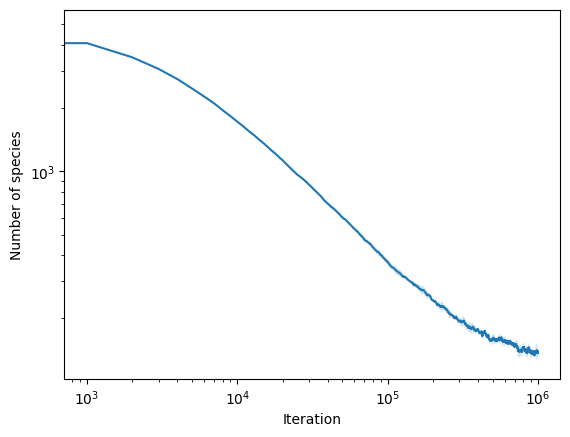

In [105]:
# Distance is equal to 72
convergence_plot(species_mean[1], species_stdev[1], iterations)

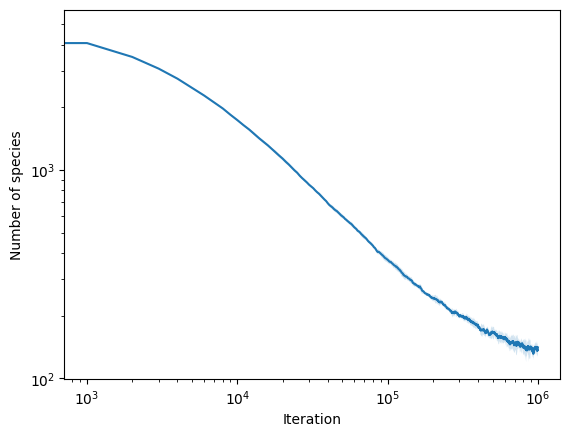

In [106]:
# Distance is equal to 108
convergence_plot(species_mean[2], species_stdev[2], iterations)

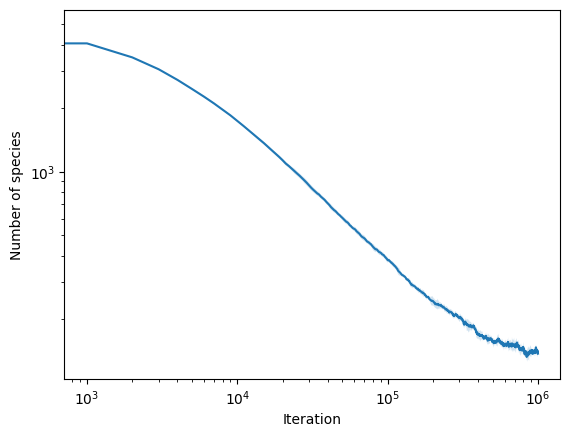

In [107]:
# Distance is equal to 180
convergence_plot(species_mean[3], species_stdev[3], iterations)

### Species Area Curve

[ 0.7178792  -1.02496814]


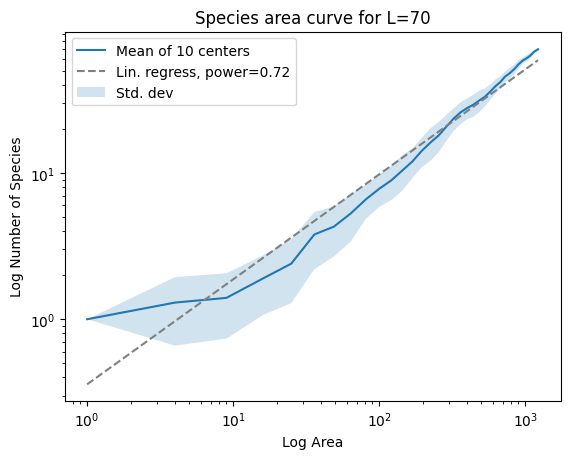

None
[ 0.70125784 -0.16964122]


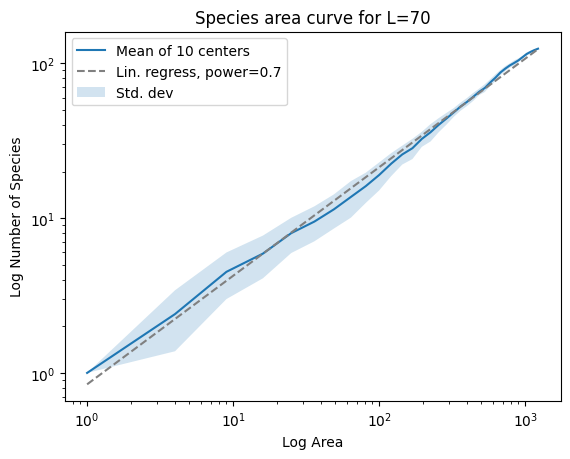

None
[ 0.69781454 -0.07981773]


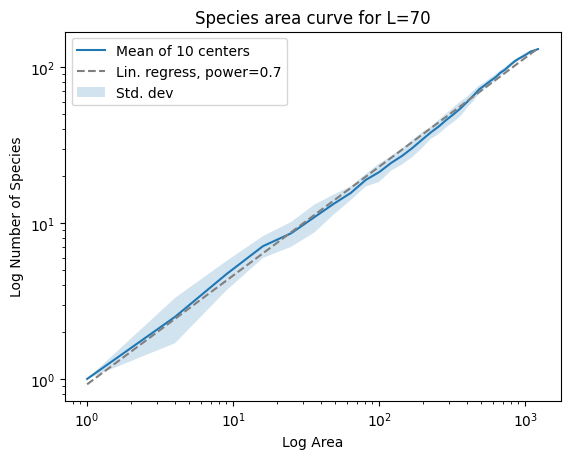

None
[ 0.71145409 -0.13166424]


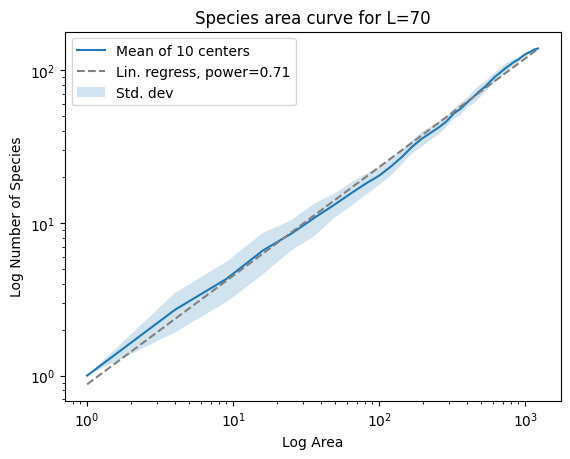

None


In [121]:
for dist in data_2:
    print(dist[0].sa_curve(dist[2].islands[1].algorithm.current_grid))

[ 0.72057212 -0.17132553]


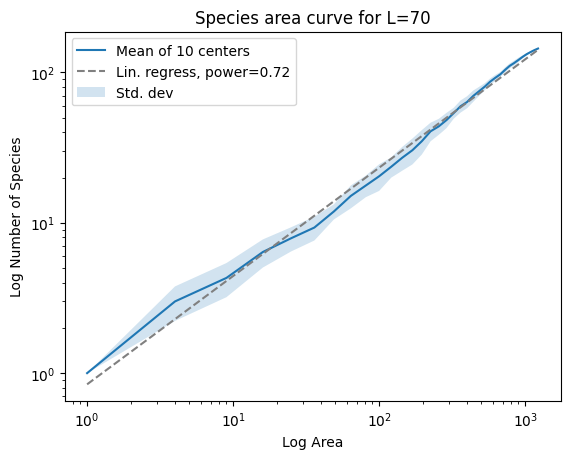

In [118]:
# SA curve for the base island
data_2[0][0].sa_curve(dist[0].islands[0].algorithm.current_grid)